**IFSP - Campus Campinas** <br>
**Pós-graduação em Ciência de Dados** <br>

**TCC - Avaliação de Projetos de Lei usando técnicas de NLP/ML**

#### Web Scrapping e Análise de Sentimentos - v 1.1 
- Web scrapping de noticias sobre vereadores de Campinas
- Analise de sentimentos usando Leia-br, uma varaiação de Vader para lingua portuguesa


Orientadora: Bianca Maria Pedrosa - IFSP Campinas<br>
Aluno: Swift Motoo Yaguchi - CP301665X

### 1. Bibliotecas

In [1]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [2]:
!pip install beautifulsoup4
!pip install leia-br

In [3]:
from tqdm import tqdm
tqdm.pandas()  # it enables some new progress bar functions/methods for pandas

### 2. Web Scrapping Fonte: Google Noticias

In [4]:
from bs4 import BeautifulSoup

In [38]:
# URL da página acessada: vereador, projeto, Câmara de Campinas, período de 10 anos no Google Noticias
URL = 'https://news.google.com/search?q=vereador%20projeto%202019%20%22C%C3%A2mara%20de%20Campinas%22%20when%3A10y&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'
#URL = 'https://news.google.com/search?q=vereador%20projeto%20%22C%C3%A2mara%20de%20Campinas%22%20when%3A10y&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'

#URL = 'https://news.google.com/search?q=vereador%20projeto%20%22C%C3%A2mara%20Municipal%20de%20Campinas%22&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'

# Realizar uma solicitação GET para obter o conteúdo da página
response = requests.get(URL)

# Verificar se a solicitação foi bem-sucedida (código de status 200)
if response.status_code == 200:
    # Usar o BeautifulSoup para analisar o conteúdo da página
    site = BeautifulSoup(response.content, 'html.parser')
    
    # Encontrar todos os títulos das notícias
    headlines = site.find_all('h3', class_='ipQwMb ekueJc RD0gLb')
    
    # Criar uma lista para armazenar os títulos
    titles = []
    
    # Extrair o texto de cada título e adicionar à lista
    for headline in headlines:
        titles.append(headline.get_text())
    
    # Criar um DataFrame a partir da lista de títulos
    df = pd.DataFrame({'Títulos': titles})
    
    # Imprimir o DataFrame
    print(df)
else:
    print("Erro ao obter a página:", response.status_code)



                                              Títulos
0   Câmara de Campinas rejeita parecer contrário d...
1   Câmara de Campinas aprova reajuste de 4,5% nos...
2   Vereadores de Campinas rejeitam abertura de CP...
3   CPI sobre propina na Câmara de Campinas vê 'fa...
4   Câmara de Campinas inicia recesso parlamentar ...
5   Câmara aprova lei para pagamento de ônibus com...
6   Câmara debate criação de um Conselho da Divers...
7   Câmara de Campinas retoma a discussão sobre o ...
8   Vereadores de Campinas começam a discutir auxí...
9   PL de Nelson Hossri contraria COI e proíbe tra...
10  Custo por vereador em 44 cidades do estado de ...
11  Projeto que pode brecar obra da barragem de Pe...
12  Câmara de Campinas vota a contratação de estag...
13  Câmara de Campinas vota hoje Projeto de Lei da...
14  Com 7 assessores pagos pela população, vereado...
15  'Ouro Verde': fora da pauta do STF há 1 mês, c...
16  Novo secretário em Campinas coloca perfil técn...
17  TCE encontrou excesso de

In [39]:
# save the datasets
df.to_csv('GoogleNoticias-VereadoresCampinas.csv', sep=';', index = False)

### 3. Análise de Sentimentos

In [40]:
# download vader model
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Swift\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [41]:
# Função para classificar o sentimento
def classify_sentiment(text: str, sent_analyzer) -> tuple:
    scores_dict = sent_analyzer.polarity_scores(text)
    
    # Determinar o sentimento com base na polaridade
    if scores_dict['compound'] > 0.0:
        sentiment_label = "Positivo"
    elif scores_dict['compound'] < 0.0:
        sentiment_label = "Negativo"
    else:
        sentiment_label = "Neutro"
    
    # Determinar a subjetividade
    positivo = scores_dict['pos']
    neutro = scores_dict['neu']
    negativo = scores_dict['neg']
    
    return sentiment_label, positivo, neutro, negativo


In [42]:
from LeIA import SentimentIntensityAnalyzer

In [43]:
sent_analyzer = SentimentIntensityAnalyzer()

In [44]:
# classify the dataset
df[['Sentimento', 'Positivo', 'Neutro', 'Negativo']] = df['Títulos'].apply(lambda text: pd.Series(classify_sentiment(text, sent_analyzer)))

In [45]:
df

,Títulos,Sentimento,Positivo,Neutro,Negativo
0,Câmara de Campinas rejeita parecer contrário d...,Negativo,0.151,0.670,0.179
1,"Câmara de Campinas aprova reajuste de 4,5% nos...",Positivo,0.197,0.803,0.000
2,Vereadores de Campinas rejeitam abertura de CP...,Positivo,0.194,0.806,0.000
3,CPI sobre propina na Câmara de Campinas vê 'fa...,Positivo,0.103,0.897,0.000
4,Câmara de Campinas inicia recesso parlamentar ...,Neutro,0.000,1.000,0.000
5,Câmara aprova lei para pagamento de ônibus com...,Positivo,0.362,0.426,0.213
6,Câmara debate criação de um Conselho da Divers...,Positivo,0.208,0.792,0.000
7,Câmara de Campinas retoma a discussão sobre o ...,Neutro,0.000,1.000,0.000
8,Vereadores de Campinas começam a discutir auxí...,Negativo,0.000,0.814,0.186
9,PL de Nelson Hossri contraria COI e proíbe tra...,Negativo,0.000,0.796,0.204


In [46]:
# save the datasets
df.to_csv('GoogleNoticias-Sentimentos.csv', sep=';', index = False)

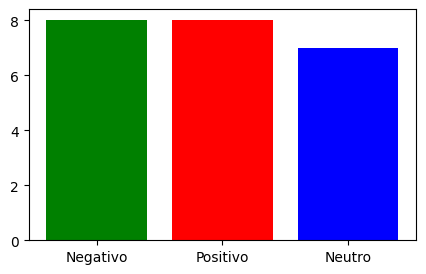

In [47]:
import matplotlib.pyplot as plt

sentimento_cores = {
    'Positivo': 'green',
    'Negativo': 'red',
    'Neutro': 'blue'
}

plt.figure(figsize=(5,3))
plt.bar(df['Sentimento'].unique(), df['Sentimento'].value_counts(), color=list(sentimento_cores.values()))
plt.show()

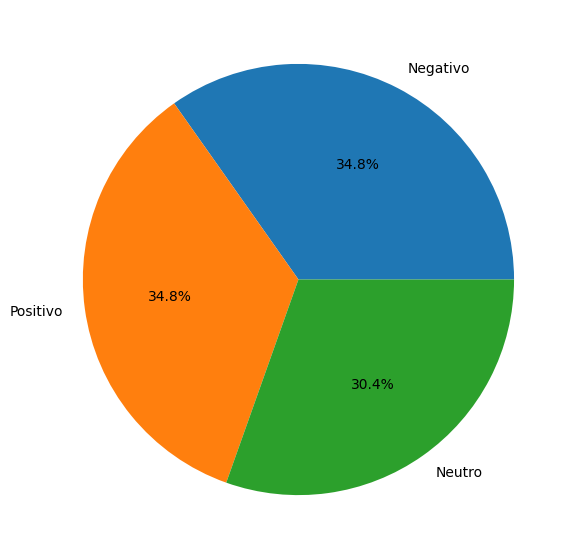

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.pie(df['Sentimento'].value_counts(), labels=df['Sentimento'].unique(), autopct='%1.1f%%')
plt.show()

In [49]:
df['Sentimento'].value_counts()

Sentimento
Negativo    8
Neutro      8
Positivo    7
Name: count, dtype: int64

In [50]:
# Selecionar apenas as linhas onde 'Negativo' > 0
selected_rows = df[df['Sentimento'] == 'Negativo']
selected_rows_sorted = selected_rows.sort_values(by='Negativo', ascending=False)

# Exibir as linhas selecionadas
#selected_rows_sorted[['Títulos', 'Negativo']]
selected_rows_sorted

,Títulos,Sentimento,Positivo,Neutro,Negativo
9,PL de Nelson Hossri contraria COI e proíbe tra...,Negativo,0.000,0.796,0.204
8,Vereadores de Campinas começam a discutir auxí...,Negativo,0.000,0.814,0.186
0,Câmara de Campinas rejeita parecer contrário d...,Negativo,0.151,0.670,0.179
22,Parcão para pets é inaugurado no Jardim Nova E...,Negativo,0.000,0.833,0.167
19,O estranho caso do outdoor com o rosto dos ver...,Negativo,0.000,0.859,0.141
14,"Com 7 assessores pagos pela população, vereado...",Negativo,0.000,0.882,0.118
18,Veja os 33 vereadores eleitos em Campinas para...,Negativo,0.000,0.882,0.118
21,Bolsonaro vai criar cabide de emprego de R$ 54...,Negativo,0.000,0.897,0.103


In [51]:
# Selecionar apenas as linhas onde 'Negativo' > 0
selected_rows = df[df['Sentimento'] == 'Positivo']
selected_rows_sorted = selected_rows.sort_values(by='Positivo', ascending=False)

# Exibir as linhas selecionadas
#print(selected_rows_sorted[['Títulos', 'Positivo']])
selected_rows_sorted

,Títulos,Sentimento,Positivo,Neutro,Negativo
5,Câmara aprova lei para pagamento de ônibus com...,Positivo,0.362,0.426,0.213
13,Câmara de Campinas vota hoje Projeto de Lei da...,Positivo,0.290,0.710,0.000
6,Câmara debate criação de um Conselho da Divers...,Positivo,0.208,0.792,0.000
1,"Câmara de Campinas aprova reajuste de 4,5% nos...",Positivo,0.197,0.803,0.000
2,Vereadores de Campinas rejeitam abertura de CP...,Positivo,0.194,0.806,0.000
15,"'Ouro Verde': fora da pauta do STF há 1 mês, c...",Positivo,0.124,0.876,0.000
3,CPI sobre propina na Câmara de Campinas vê 'fa...,Positivo,0.103,0.897,0.000


In [52]:
# Selecionar apenas as linhas onde 'Negativo' > 0
selected_rows = df[df['Sentimento'] == 'Neutro']
selected_rows_sorted = selected_rows.sort_values(by='Neutro', ascending=False)

# Exibir as linhas selecionadas
#print(selected_rows_sorted[['Títulos', 'Neutro']])
selected_rows_sorted

,Títulos,Sentimento,Positivo,Neutro,Negativo
4,Câmara de Campinas inicia recesso parlamentar ...,Neutro,0.0,1.0,0.0
7,Câmara de Campinas retoma a discussão sobre o ...,Neutro,0.0,1.0,0.0
10,Custo por vereador em 44 cidades do estado de ...,Neutro,0.0,1.0,0.0
11,Projeto que pode brecar obra da barragem de Pe...,Neutro,0.0,1.0,0.0
12,Câmara de Campinas vota a contratação de estag...,Neutro,0.0,1.0,0.0
16,Novo secretário em Campinas coloca perfil técn...,Neutro,0.0,1.0,0.0
17,TCE encontrou excesso de cargos por indicação ...,Neutro,0.0,1.0,0.0
20,"Com 6.500 crianças sem creche, governo Jonas p...",Neutro,0.0,1.0,0.0


In [53]:
#!pip install spacy
# PLOs são em português 
#!python -m spacy download pt_core_news_sm  

In [54]:
import spacy
from spacy.lang.pt.stop_words import STOP_WORDS
from spacy.lang.pt import Portuguese
nlp = Portuguese()

In [55]:
nlp_spacy = spacy.load("pt_core_news_sm")   # Portuguese small vocabulary

In [56]:
def remove_stopwords(doc: spacy.tokens.doc.Doc) -> list:
    tokens_without_stopwords = [token.text for token in doc if not token.is_stop]
    text_without_stopwords = ' '.join(tokens_without_stopwords)
    return text_without_stopwords

In [57]:
import re
def process_text(texts):
    final_text_list=[]
    for sent in texts:
        sent = sent.lower() # Lowercase 
        sent = sent.strip() # Remove leading/trailing whitespace
        sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
        sent = re.sub('[^\w\s]', '', sent)  # Remove punctuations
        sent = re.sub('\n', '', sent)  # Remove line feed
        sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:
        sent = re.sub('câmara', ' ', sent) # Remove words
        sent = re.sub('campinas', ' ', sent) # Remove words
        sent = re.sub('vereadores', ' ', sent) # Remove words
        sent = re.sub('vereador', ' ', sent) # Remove words
        sent = re.sub('aprova', ' ', sent) # Remove words
        sent = re.sub('projeto', ' ', sent) # Remove words
        sent = re.sub('vota', ' ', sent) # Remove words
        filtered_sentence=[]
        sent1 = nlp(sent)
        sent2 = remove_stopwords(sent1)
        filtered_sentence.append(sent2)
        final_string = " ".join(filtered_sentence) # Final string of cleaned words
        final_text_list.append(final_string)
    return final_text_list

In [58]:
print('Processand a coluna Títulos')
df['Títulos'] = process_text(df['Títulos'].tolist())

Processand a coluna Títulos


In [59]:
df

,Títulos,Sentimento,Positivo,Neutro,Negativo
0,rejeita parecer contrário tce contas ...,Negativo,0.151,0.670,0.179
1,reajuste 45 salários servidores munici...,Positivo,0.197,0.803,0.000
2,rejeitam abertura cp propina,Positivo,0.194,0.806,0.000
3,cpi propina vê fatos graves pede abertur...,Positivo,0.103,0.897,0.000
4,inicia recesso parlamentar,Neutro,0.000,1.000,0.000
5,lei pagamento ônibus cartões celular,Positivo,0.362,0.426,0.213
6,debate criação diversidade sexual,Positivo,0.208,0.792,0.000
7,retoma discussão modelo cívicomilitar en...,Neutro,0.000,1.000,0.000
8,começam discutir auxíliomoradia,Negativo,0.000,0.814,0.186
9,pl nelson hossri contraria coi proíbe transgên...,Negativo,0.000,0.796,0.204


In [60]:
# classes/genres
notas = sorted(df['Sentimento'].unique())
print(notas)

['Negativo', 'Neutro', 'Positivo']


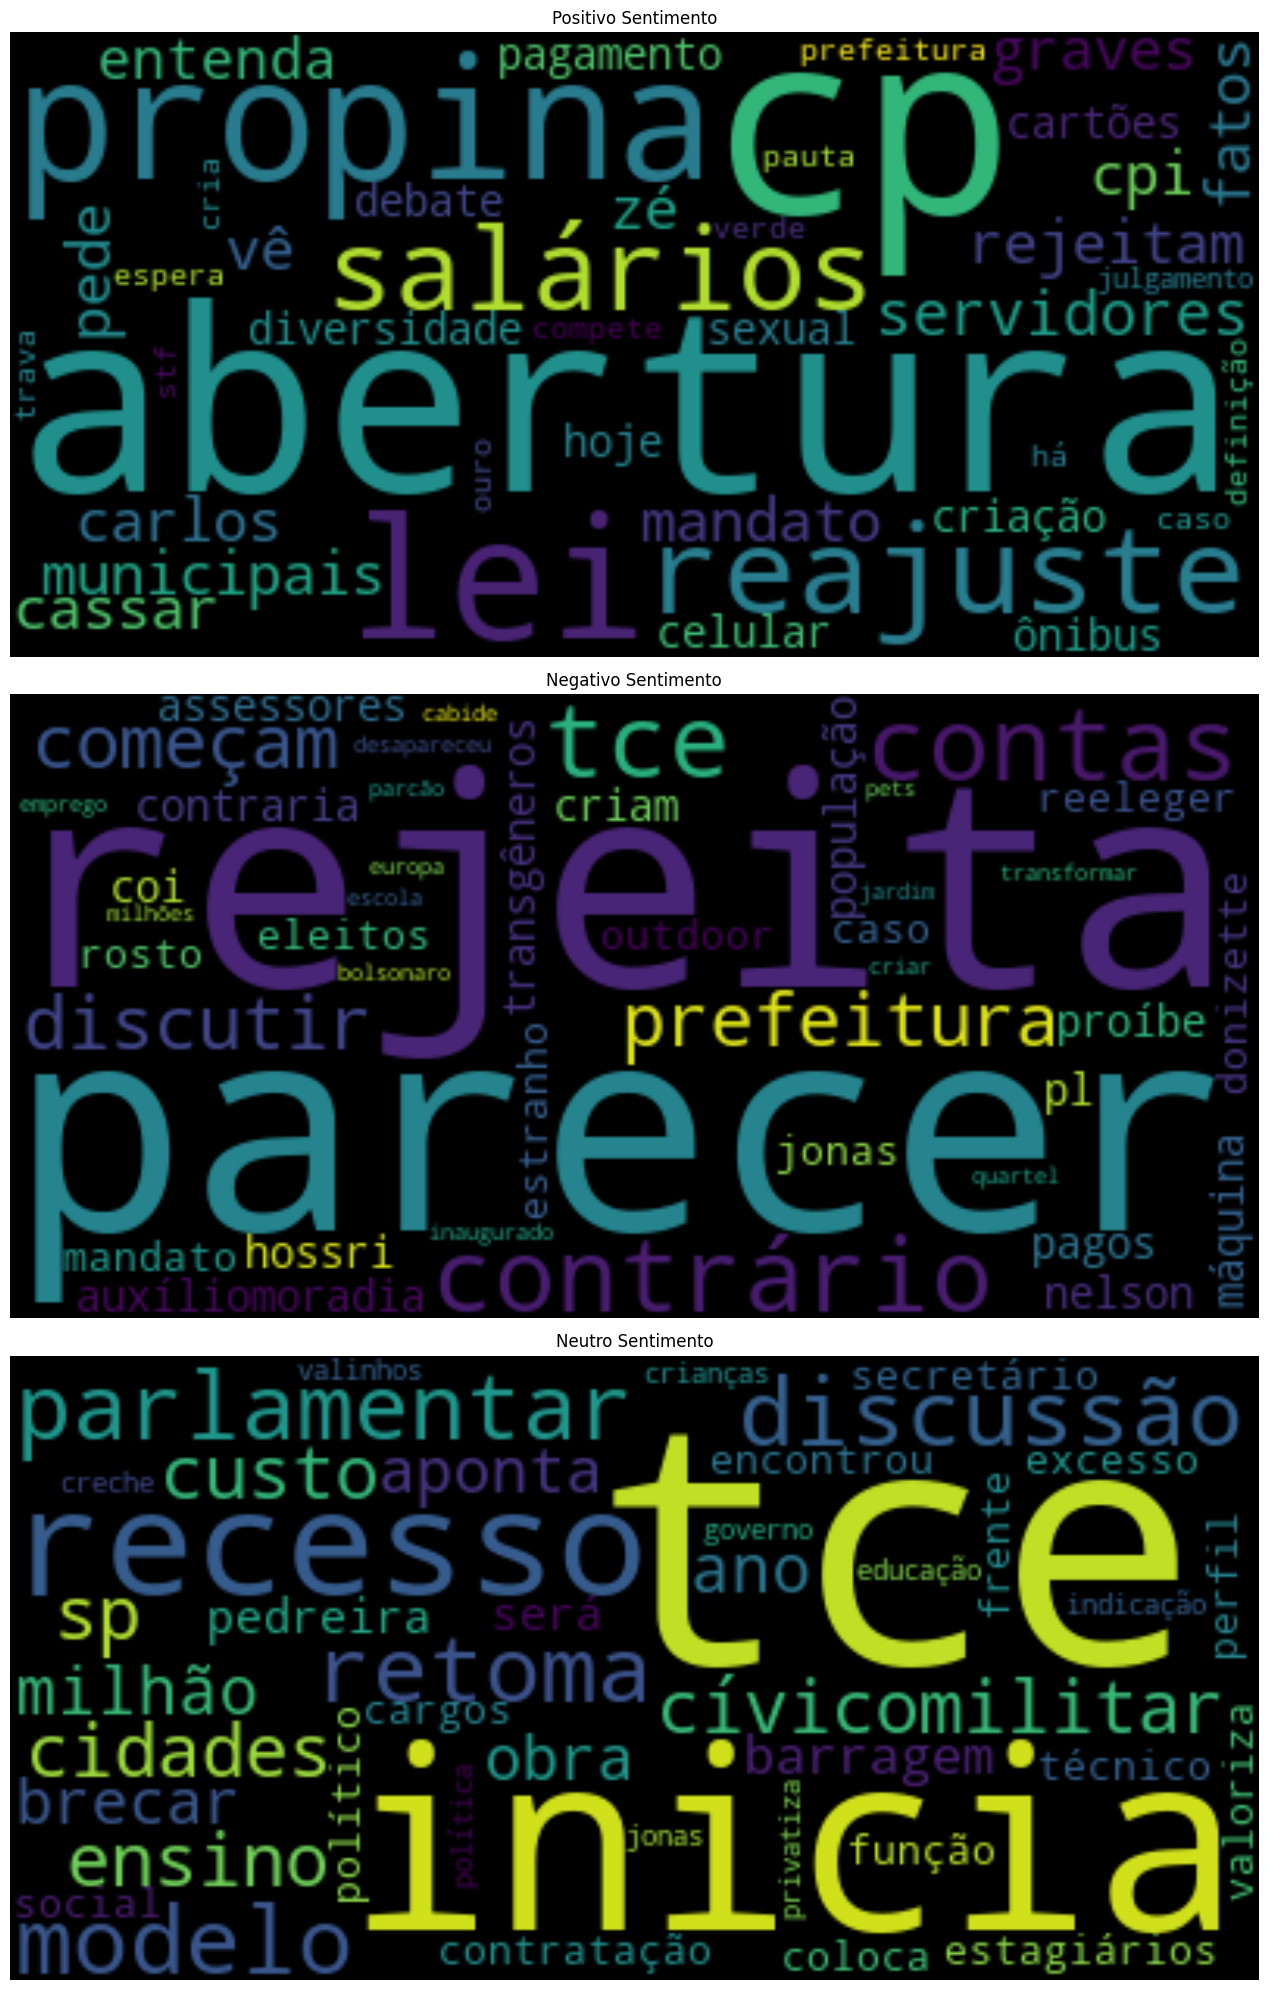

In [61]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Seu DataFrame e categorias de sentimentos
#df = ...  # Seu DataFrame
notas = ["Positivo", "Negativo", "Neutro"]

fig, axes = plt.subplots(3, 1, figsize=(15, 20))
for idx, nota in enumerate(notas):
    df_nota = df[df['Sentimento'] == nota]
    text = ' '.join(df_nota['Títulos'])
    wordcloud = WordCloud().generate(text)
    
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].set_title(f'{nota} Sentimento')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()



Pode-se observar que nos títulos de notícias sobre os vereadores de Campinas:
- "criação" parece gerar mais sentimentos positivos
- "Rejeita" parece gerar mais sentimentos negativos
- "Salário, CPI" parece que não geram sentimentos negativos e apenas sentimentos neutros

Não é intenção gerar modelos de ML para análise de sentimentos mas sim analisar os sentimentos no todo das notícias referenetes a vereadores de Campinas

In [30]:
# URL da página que você deseja extrair
url = 'https://horacampinas.com.br/ocupacao-teme-perder-projeto-semelhante-ao-do-mandela-e-protesta-na-camara/'

# Fazendo uma solicitação GET para obter o conteúdo da página
response = requests.get(url)
content = response.content

# Criando um objeto BeautifulSoup para analisar o conteúdo HTML
soup = BeautifulSoup(content, 'html.parser')

# Encontrando todas as tags de parágrafo (<p>) e extraindo o texto
paragraphs = soup.find_all('p')

# Extrair o texto dos parágrafos e armazená-los em uma única lista
text_list = [paragraph.get_text() for paragraph in paragraphs]

# Juntar todos os itens da lista em um único texto
full_text = ' '.join(text_list)

full_text

'Manifestantes da Vila Paula estiveram presentes na sessão de segunda-feira (19) da Câmara de Campinas. Fotos: Divulgação A polêmica envolvendo o plano da Prefeitura para atender as famílias do loteamento social Nelson Mandela levou integrantes da ocupação da Vila Paula, na região do San Martin, a se manifestarem na sessão da Câmara de Campinas na noite desta segunda-feira (19). O temor deles é que a repercussão negativa do chamado projeto “casas-embrião” freie as negociações que realizam com a Prefeitura para adquirirem os imóveis.\nGrupos que buscam uma moradia regularizada em área planejada, no terreno próximo à Companhia de Desenvolvimento Habitacional e Urbano (CDHU), discutem atualmente com a Prefeitura a instalação de um empreendimento semelhante ao desenvolvido no espaço do Dic 5, que conta com luz elétrica, água encanada, asfalto e casas-embrião.\nO tamanho das moradias de 15m² foi duramente criticado pelo presidente da República, Luiz Inácio Lula da Silva. O prefeito de Campi

In [31]:
cleaned_text = ' '.join(full_text.split())
cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)
cleaned_text = cleaned_text.lower()

In [32]:
#cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)

In [33]:
#cleaned_text = cleaned_text.lower()

In [34]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('portuguese'))
words = cleaned_text.split()
cleaned_words = [word for word in words if word not in stop_words]
cleaned_text = ' '.join(cleaned_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Swift\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
cleaned_text

'manifestantes vila paula presentes sessão segundafeira 19 câmara campinas fotos divulgação polêmica envolvendo plano prefeitura atender famílias loteamento social nelson mandela levou integrantes ocupação vila paula região san martin manifestarem sessão câmara campinas noite desta segundafeira 19 temor repercussão negativa chamado projeto casasembrião freie negociações realizam prefeitura adquirirem imóveis grupos buscam moradia regularizada área planejada terreno próximo companhia desenvolvimento habitacional urbano cdhu discutem atualmente prefeitura instalação empreendimento semelhante desenvolvido espaço dic 5 conta luz elétrica água encanada asfalto casasembrião tamanho moradias 15m² duramente criticado presidente república luiz inácio lula silva prefeito campinas dário saadi respondeu lula falou conhecimento contexto questão transformou debate nacional manifestação moradores vila paula câmara favor prefeito falou favor presidente falou disse vereador rubens gás psb frente caso g

In [37]:
# Realizar a análise de sentimento usando a função classify_sentiment
sentiment_label, positivo, neutro, negativo = classify_sentiment(cleaned_text)

# Exibir o resultado da análise de sentimento
print("Sentimento:", sentiment_label)
print("Positivo:", positivo)
print("Neutro:", neutro)
print("Negativo:", negativo)

TypeError: classify_sentiment() missing 1 required positional argument: 'sent_analyzer'

In [192]:
row_56 = df.iloc[56]
Título_do_artigo = row_56['Títulos']
Título_do_artigo

'Ocupação teme perder projeto semelhante ao do Mandela e ...'

In [193]:
# Realizar a análise de sentimento usando a função classify_sentiment
sentiment_label, positivo, neutro, negativo = classify_sentiment(Título_do_artigo, sia)

# Exibir o resultado da análise de sentimento
print("Sentimento:", sentiment_label)
print("Positivo:", positivo)
print("Neutro:", neutro)
print("Negativo:", negativo)

Sentimento: Negativo
Positivo: 0.0
Neutro: 0.579
Negativo: 0.421


Pode-se observar que o título do artigo, com poucas palavras, indica maior sentimento negativo do que o texto inteiro do artigo